In [4]:
pip install scikit-learn pandas matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve

In [7]:
df = pd.read_csv("/content/data.csv")
print(df.head())

'''from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Convert to a pandas DataFrame
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
'''

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

"from sklearn.datasets import load_breast_cancer\ndata = load_breast_cancer()\n\n# Convert to a pandas DataFrame\nimport pandas as pd\ndf = pd.DataFrame(data.data, columns=data.feature_names)\ndf['target'] = data.target\n"

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Step 1: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Standardize features (zero mean, unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training set
X_test_scaled = scaler.transform(X_test)        # Transform test set using same scaler

In [9]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [10]:
# Print learned coefficients
import numpy as np

coefficients = pd.Series(log_reg.coef_[0], index=X.columns)
print(coefficients.sort_values(ascending=False))

mean compactness           0.648342
compactness error          0.647227
fractal dimension error    0.437894
symmetry error             0.360492
texture error              0.248823
mean fractal dimension     0.199732
concavity error            0.160563
worst compactness          0.055514
smoothness error          -0.160276
mean symmetry             -0.167233
worst fractal dimension   -0.187251
mean smoothness           -0.212479
concave points error      -0.443784
mean perimeter            -0.476298
mean radius               -0.511479
mean area                 -0.541059
perimeter error           -0.544333
mean texture              -0.552698
mean concavity            -0.602103
mean concave points       -0.704156
worst smoothness          -0.746625
worst perimeter           -0.763220
worst concavity           -0.823151
area error                -0.929104
worst symmetry            -0.939181
worst radius              -0.947616
worst area                -0.947756
worst concave points      -0

Confusion Matrix:
 [[41  1]
 [ 1 71]]
Precision: 0.99
Recall: 0.99
ROC-AUC Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



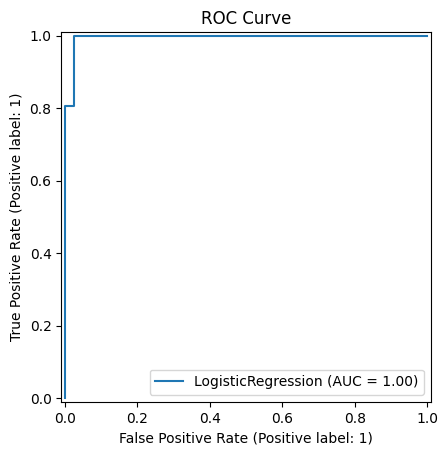

In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt

# Step 1: Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC

# Step 2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Step 3: Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Step 4: ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Step 5: Full Classification Report (optional)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Get predicted probabilities for class 1
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Manually set a custom threshold
threshold = 0.3
y_pred_custom = (y_proba >= threshold).astype(int)

# Evaluate
cm = confusion_matrix(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)

print(f"Threshold: {threshold}")
print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Threshold: 0.3
Confusion Matrix:
 [[40  2]
 [ 0 72]]
Precision: 0.97
Recall: 1.00
